# Análisis y Modelación de Series de Tiempo
Utilizando los datos sobre los precios, el consumo y la importación de los diferentes tipos de gasolina a nivel nacional.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

## Lectura de Datos

In [3]:
def get_df(path: str) -> pd.DataFrame:
    temp = pd.read_csv(path)
    temp['Fecha'] = pd.to_datetime(temp['Fecha'])
    temp.set_index('Fecha', inplace=True)
    temp = temp.asfreq('MS')  # Frecuencia mensual
    return temp

In [4]:
df_consumo = get_df('data/consumo.csv')
df_consumo.head()

,Diesel,Propano,Regular,Super
Fecha,,,,
2000-01-01,0.0,194410.476190,202645.20,308156.82
2000-02-01,0.0,174710.552381,205530.96,307766.31
2000-03-01,0.0,189234.066667,229499.56,331910.29
2000-04-01,0.0,174330.607143,210680.40,315648.08
2000-05-01,0.0,191745.147619,208164.34,319667.97


En el documento de [análisis](analysis.ipynb) se puede encontrar que Diesel contiene datos no registrados, por lo que se eliminan.

In [5]:
df_consumo = df_consumo[df_consumo['Diesel'] > 0]

In [6]:
df_importacion = get_df('data/importacion.csv')
df_importacion.head()

,Diesel,Propano,Regular,Super
Fecha,,,,
2001-01-01,0.0,194065.738095,177776.50,373963.96
2001-02-01,0.0,170703.380952,123115.99,243091.07
2001-03-01,0.0,161837.371429,161726.42,312084.38
2001-04-01,0.0,163048.642857,127338.74,285054.89
2001-05-01,0.0,171518.861905,168730.19,300913.67


En el documento de [análisis](analysis.ipynb) se puede encontrar que Diesel contiene datos no registrados, por lo que se eliminan.

In [7]:
df_importacion = df_importacion[df_importacion['Diesel'] > 0]

In [8]:
df_precio = get_df('data/precios.csv')
df_precio.head()

,Super,Regular,Diesel
Fecha,,,
2002-01-01,12.55,12.19,8.95
2002-02-01,12.29,11.90,8.66
2002-03-01,12.58,12.17,8.69
2002-04-01,14.11,13.71,9.38
2002-05-01,14.16,13.79,9.44


## 2. Análisis de Series de Tiempo

### 2.a Inicio, Fin y Frecuencia

#### Consumo

In [9]:
print('Inicio:', df_consumo.index.min().strftime('%Y-%m'))
print('Fin:', df_consumo.index.max().strftime('%Y-%m'))
print('Frecuencia:', df_consumo.index.freq)

Inicio: 2018-01
Fin: 2024-05
Frecuencia: <MonthBegin>


#### Importación

In [10]:
print('Inicio:', df_importacion.index.min().strftime('%Y-%m'))
print('Fin:', df_importacion.index.max().strftime('%Y-%m'))
print('Frecuencia:', df_importacion.index.freq)

Inicio: 2018-01
Fin: 2024-05
Frecuencia: <MonthBegin>


#### Precio

In [11]:
print('Inicio:', df_precio.index.min().strftime('%Y-%m'))
print('Fin:', df_precio.index.max().strftime('%Y-%m'))
print('Frecuencia:', df_precio.index.freq)

Inicio: 2002-01
Fin: 2024-05
Frecuencia: <MonthBegin>


### 2.b Gráficos de Series
Los gráficos pueden encontrarse en archivo de [análisis](analysis.ipynb).

### 2.c Descompocisión de Series

In [12]:
def plot_decompose(df: pd.DataFrame, column: str):
    decomposition = seasonal_decompose(df[column], model='additive')
    fig, ax = plt.subplots(4, 1, figsize=(10, 8))
    ax[0].plot(decomposition.observed, label='Observed')
    ax[0].legend()
    ax[1].plot(decomposition.trend, label='Trend')
    ax[1].legend()
    ax[2].plot(decomposition.seasonal, label='Seasonal')
    ax[2].legend()
    ax[3].plot(decomposition.resid, label='Residual')
    ax[3].legend()
    plt.tight_layout()
    plt.show()

#### Consumo

##### Gasolina Diesel

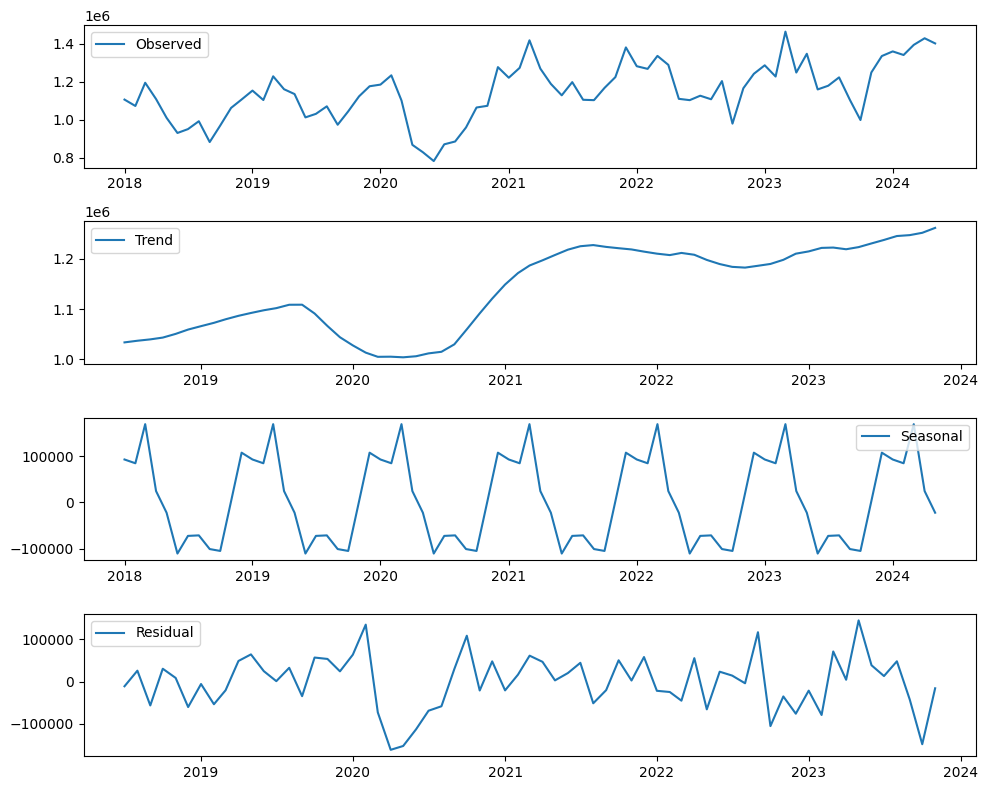

In [13]:
plot_decompose(df_consumo, 'Diesel')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Regular

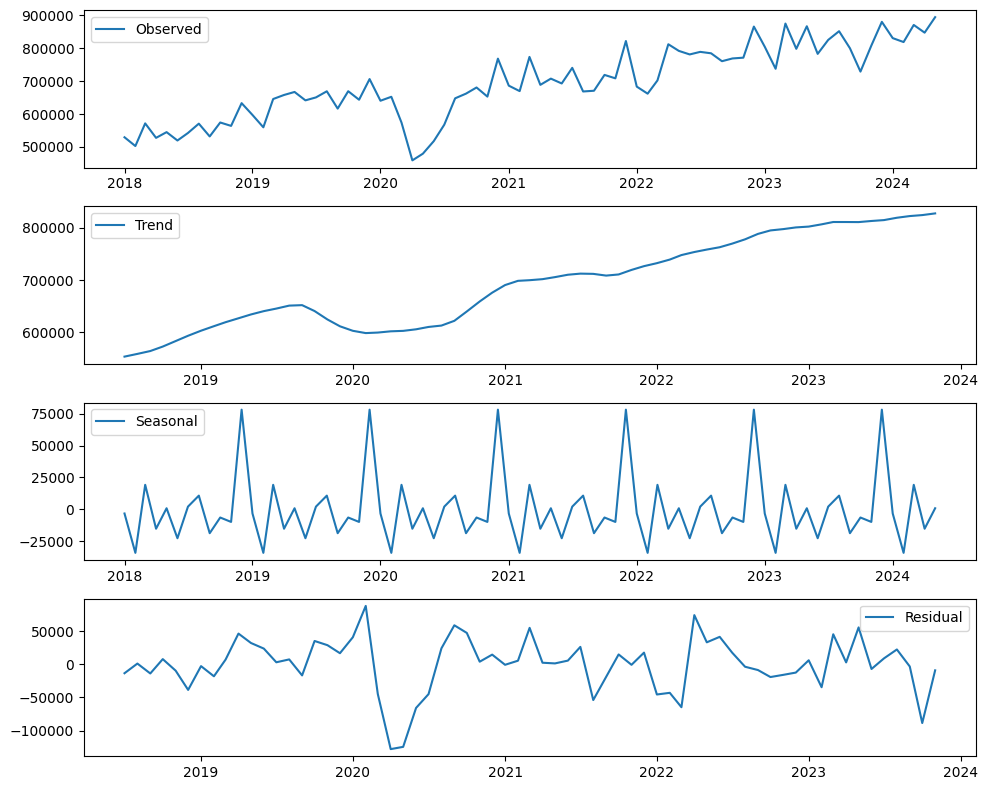

In [14]:
plot_decompose(df_consumo, 'Regular')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Super

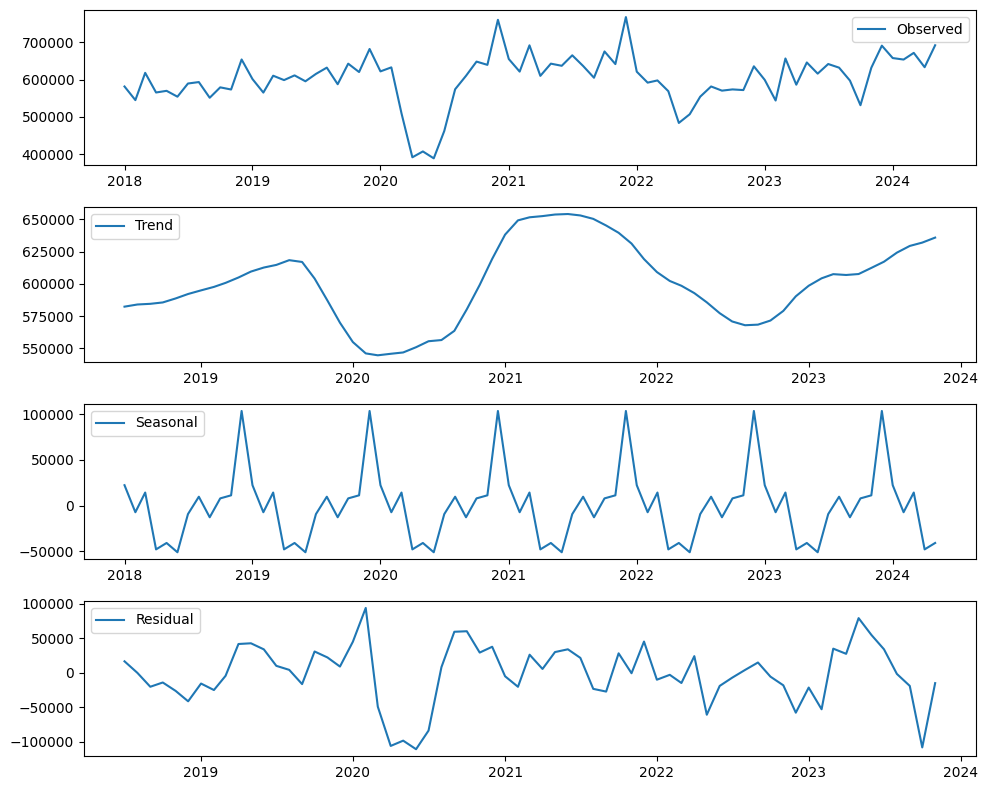

In [15]:
plot_decompose(df_consumo, 'Super')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gas Propano

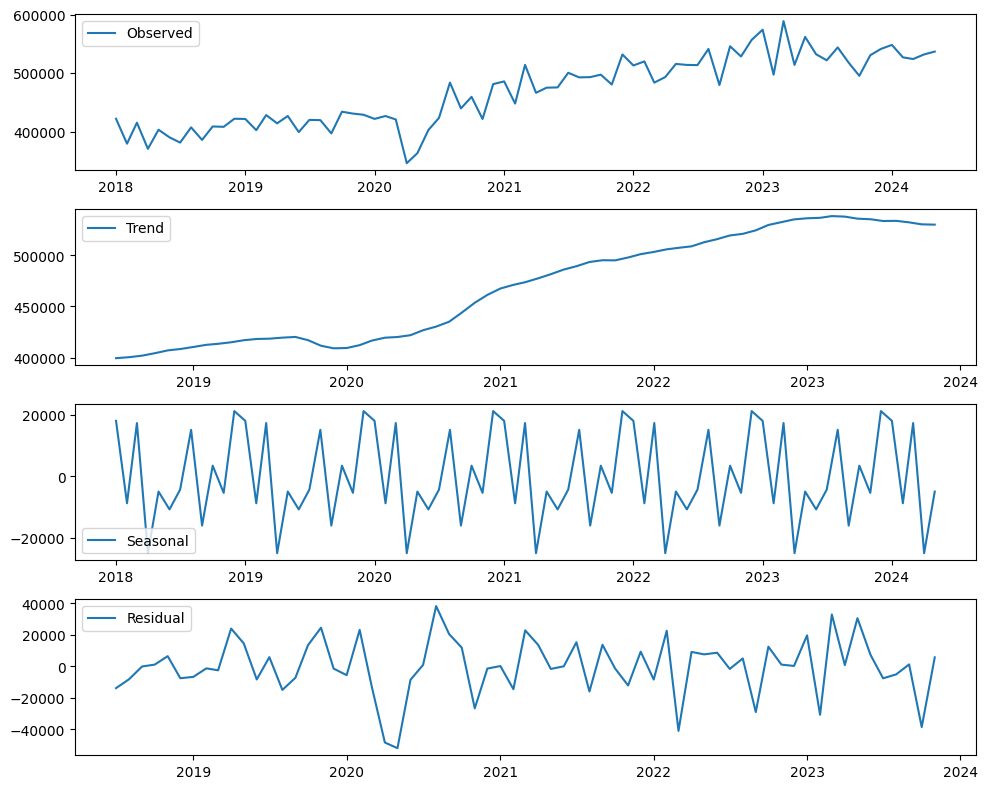

In [16]:
plot_decompose(df_consumo, 'Propano')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

#### Importación

##### Gasolina Diesel

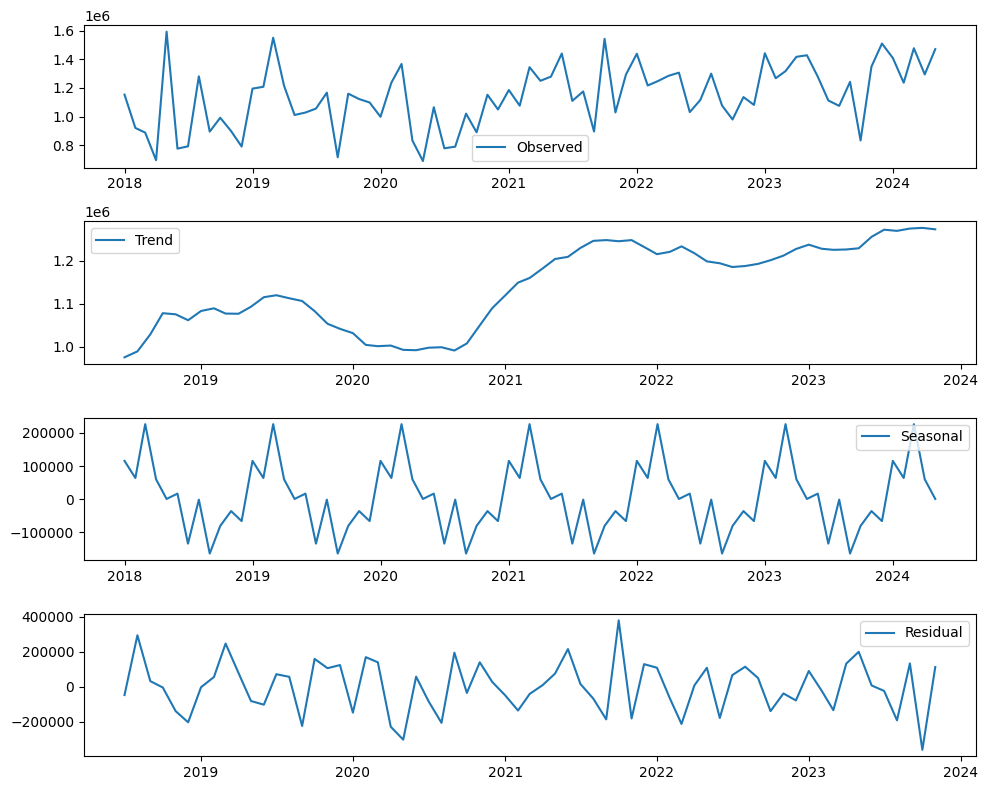

In [17]:
plot_decompose(df_importacion, 'Diesel')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Regular

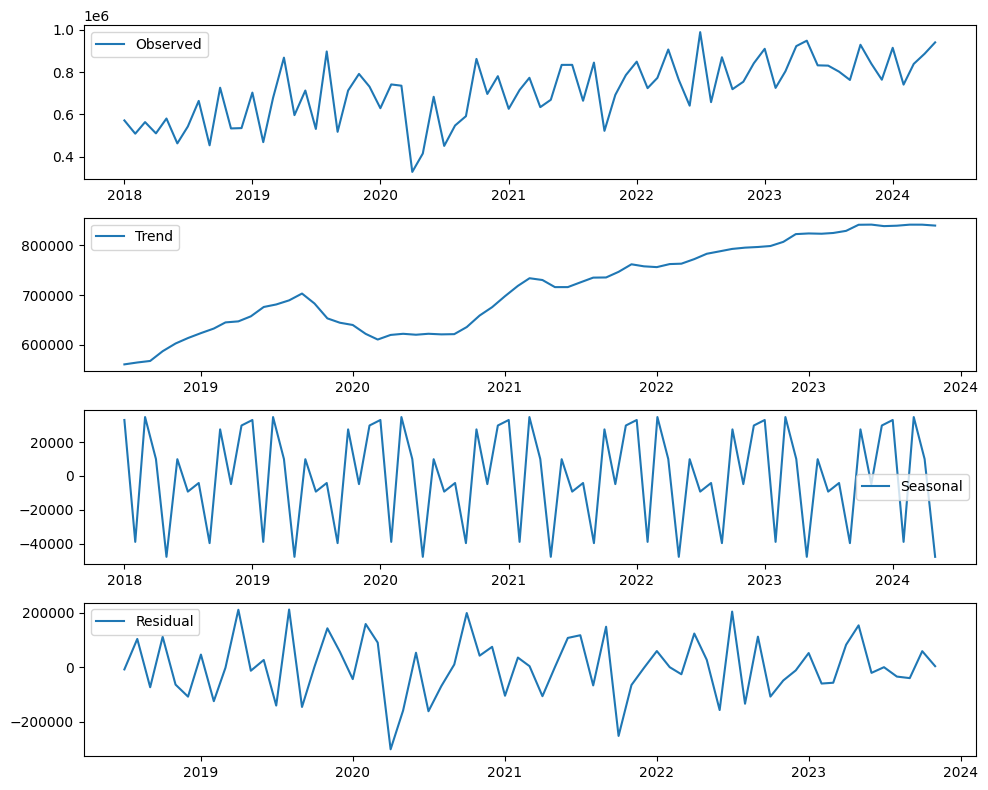

In [18]:
plot_decompose(df_importacion, 'Regular')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Super

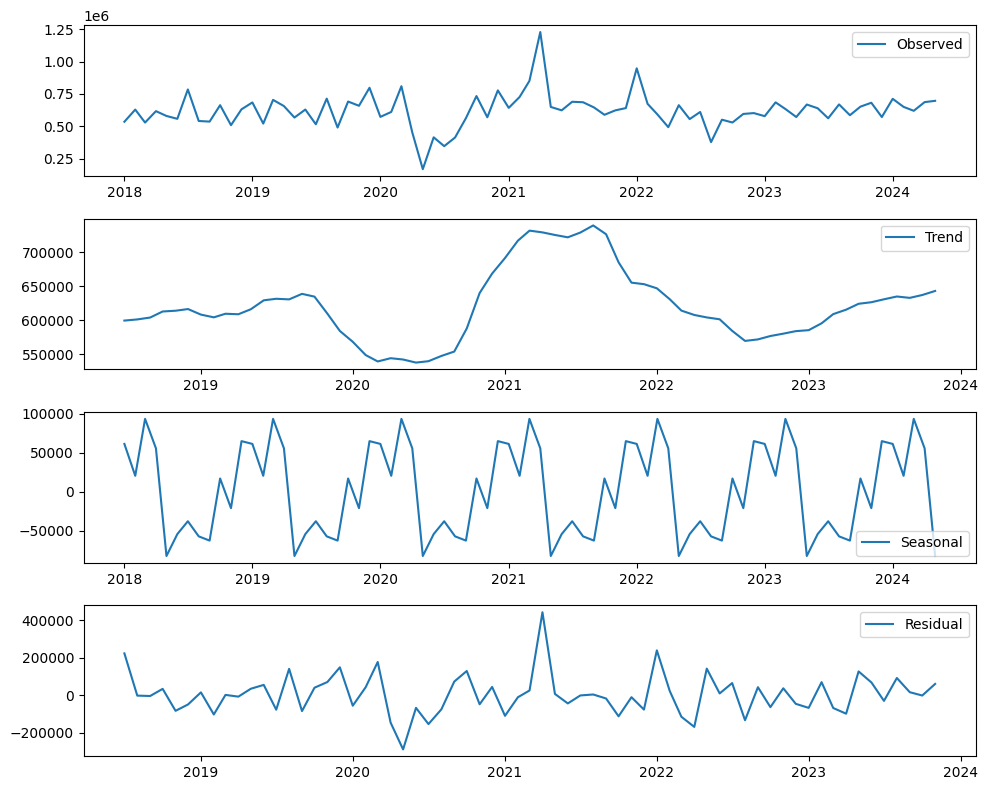

In [19]:
plot_decompose(df_importacion, 'Super')

**AL FIN ALGO DISTINTO**

Se puede observar que tanto en media y varianza, dejando de lado los años de pandemia que provocaron que los datos tuvieran un comportamiento extraño, la serie de tiempo es estacionaria.

##### Gas Propano

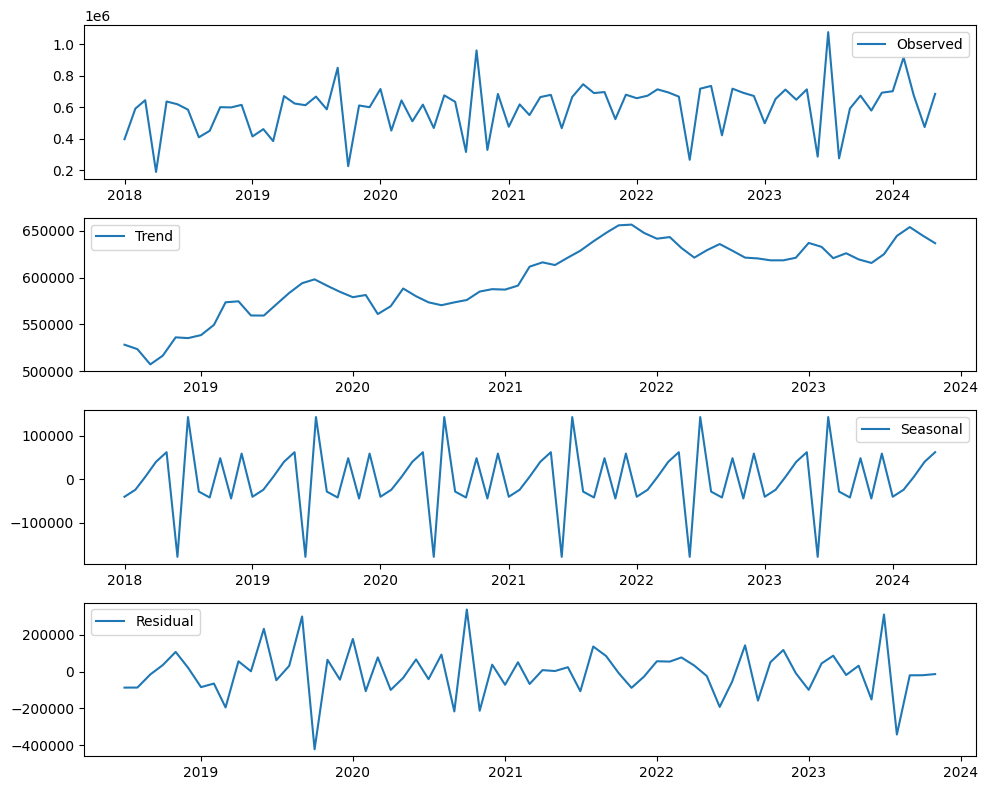

In [20]:
plot_decompose(df_importacion, 'Propano')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

#### Precio

##### Gasolina Diesel

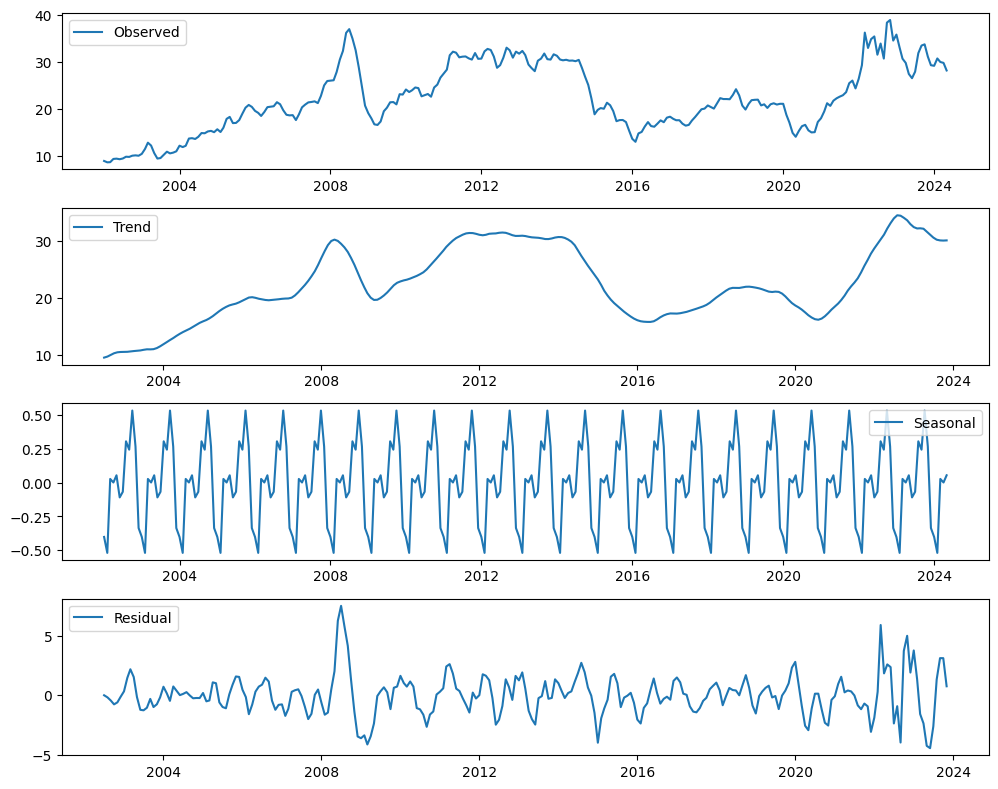

In [21]:
plot_decompose(df_precio, 'Diesel')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Regular

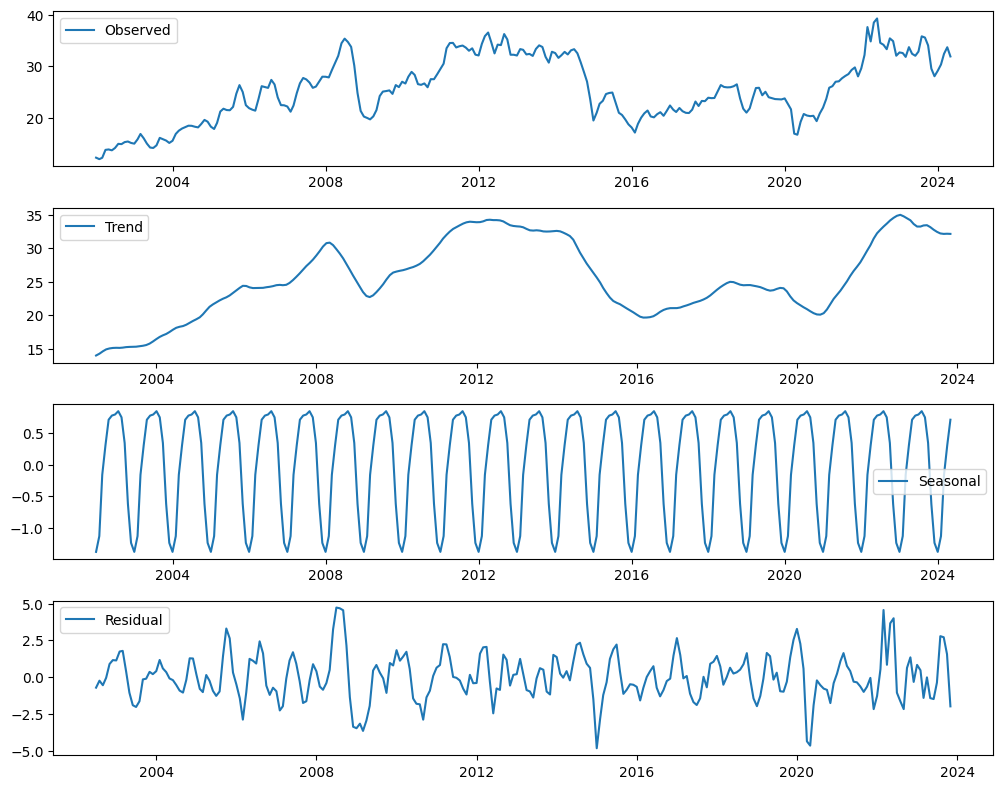

In [22]:
plot_decompose(df_precio, 'Regular')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

##### Gasolina Super

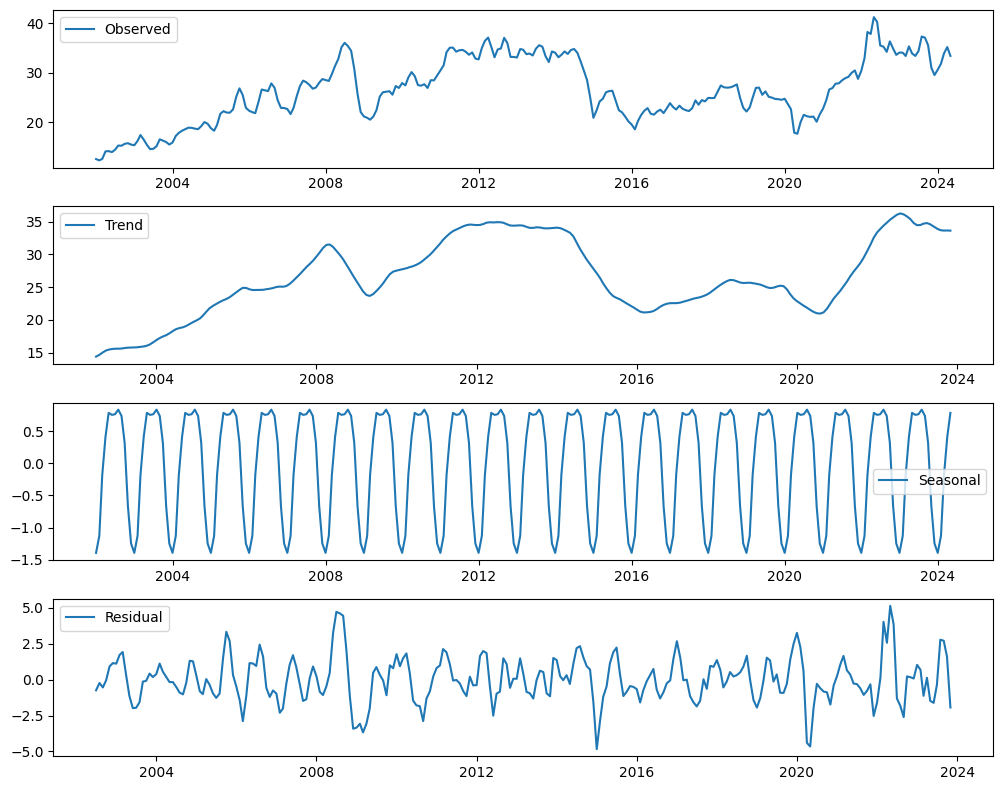

In [23]:
plot_decompose(df_precio, 'Super')

**Media:** Podemos ver que tiene tendencia, por lo que no es estacionaria en media.

**Varianza:** Podemos ver que la varianza entre los residuales no es constante, por lo que no es estacionaria en varianza.

### 2.d ¿Es necesario transformar las series?
Si, ninguna tiene una tendencia exponencial, pero en todas se encuentra presente. El realizar una diferenciación de la serie de tiempo puede ayudar a que la serie sea estacionaria.

### 2.e Pruebas de Estacionariedad

#### Consumo

##### Gasolina Diesel

###### Gráfico de Autocorrelación

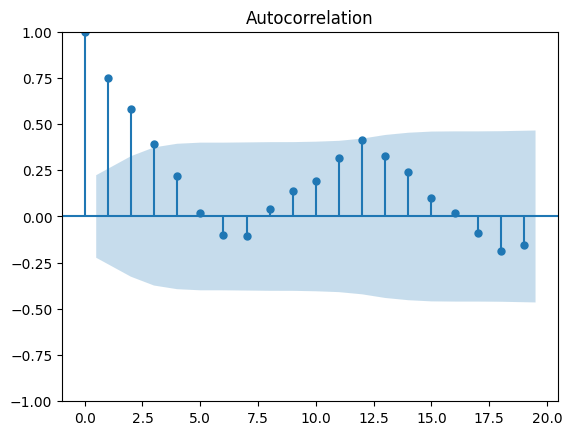

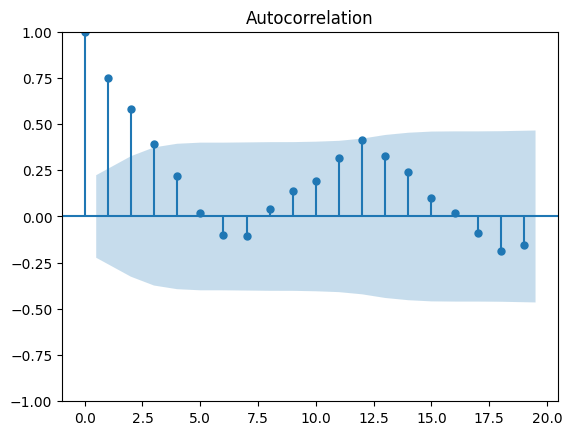

In [24]:
plot_acf(df_consumo['Diesel'])

In [25]:
df_consumo['Diesel_diff'] = df_consumo['Diesel'].diff()

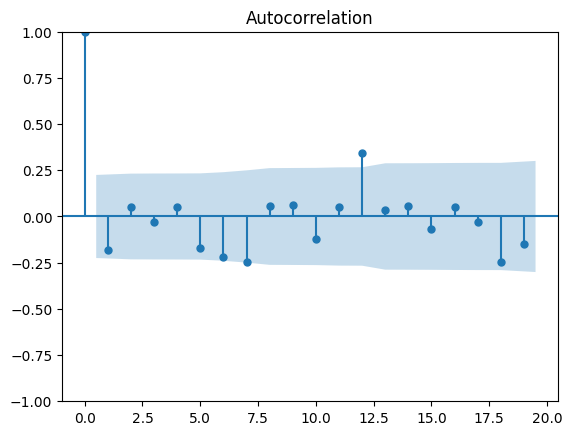

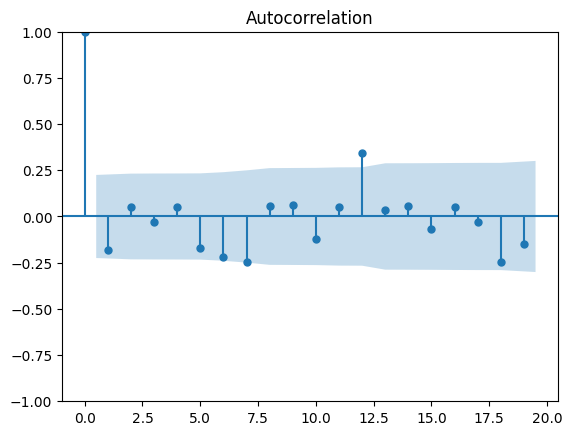

In [26]:
plot_acf(df_consumo['Diesel_diff'].dropna())

###### Prueba de Dickey-Fuller

In [27]:
result = adfuller(df_consumo['Diesel_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.012022622207928
p-value: 0.03378679083474058


<Axes: xlabel='Fecha'>

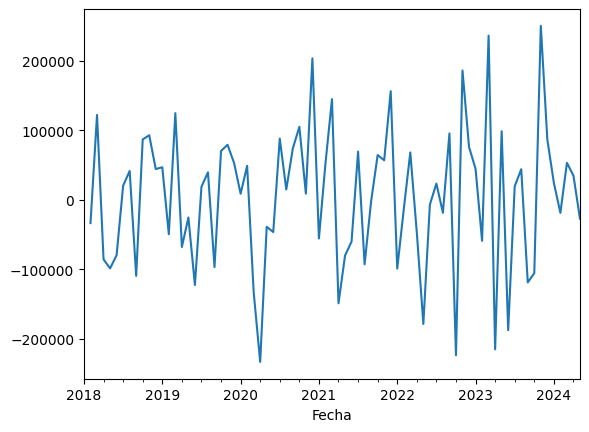

In [28]:
df_consumo['Diesel_diff'].plot()

Podemos observar como fue necesaria la implementación de una diferenciación para que la serie de tiempo sea estacionaria.

##### Gasolina Regular

###### Gráfico de Autocorrelación

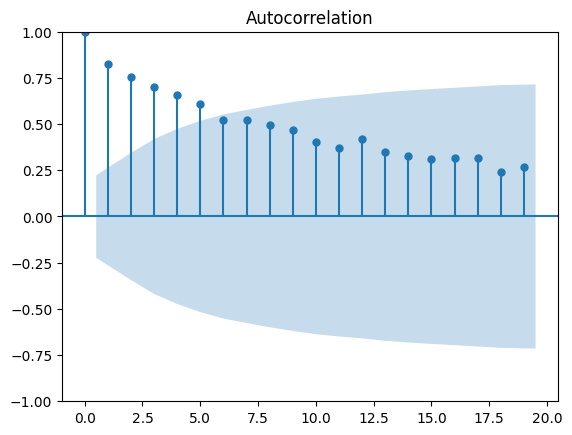

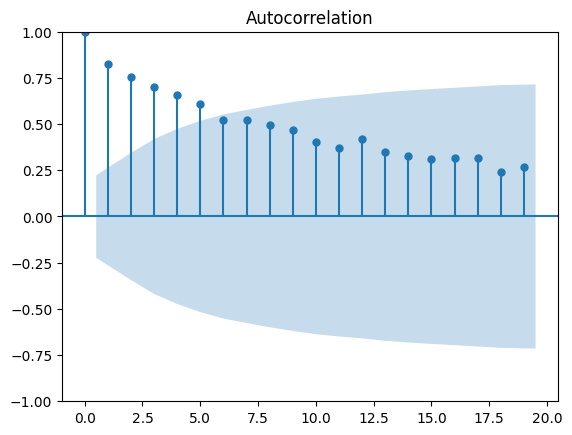

In [29]:
plot_acf(df_consumo['Regular'])

In [30]:
df_consumo['Regular_diff'] = df_consumo['Regular'].diff()

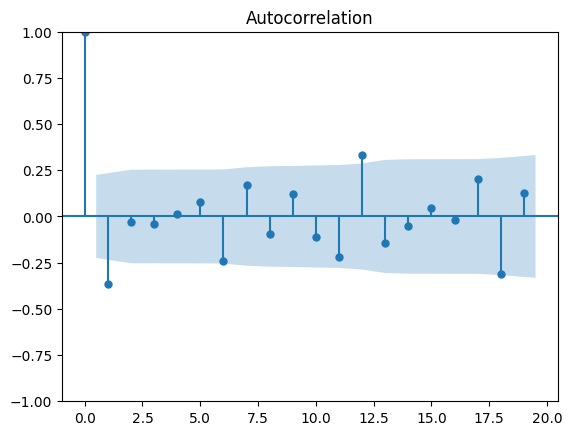

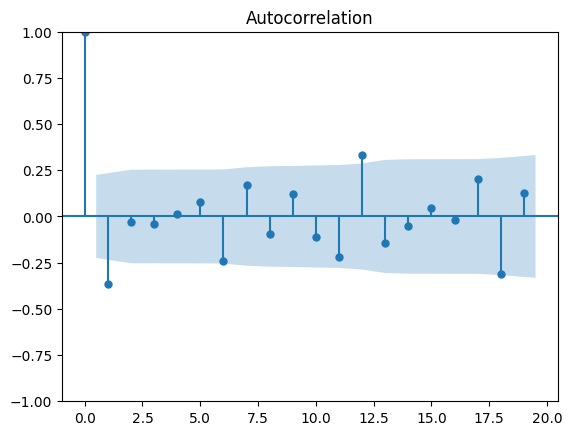

In [31]:
plot_acf(df_consumo['Regular_diff'].dropna())

###### Prueba de Dickey-Fuller

In [32]:
result = adfuller(df_consumo['Regular_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -8.44790799646411
p-value: 1.6930783699275832e-13


Podemos observar como fue necesaria la implementación de una diferenciación para que la serie de tiempo sea estacionaria.

##### Gasolina Super

###### Gráfico de Autocorrelación

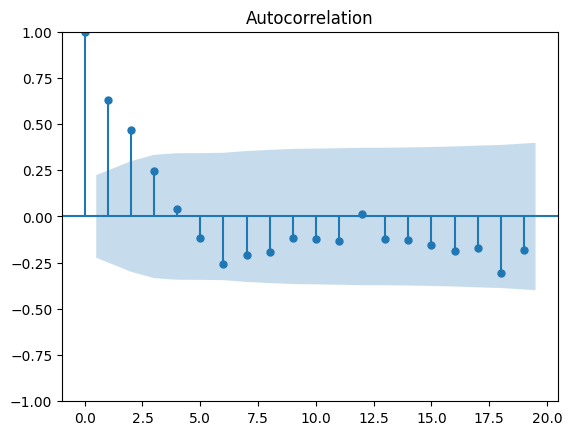

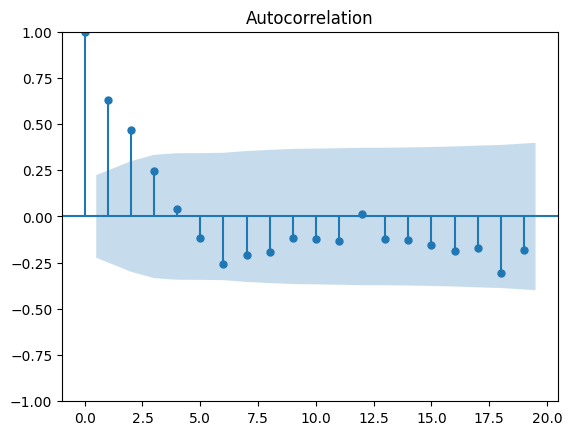

In [33]:
plot_acf(df_consumo['Super'])

In [34]:
df_consumo['Super_diff'] = df_consumo['Super'].diff()

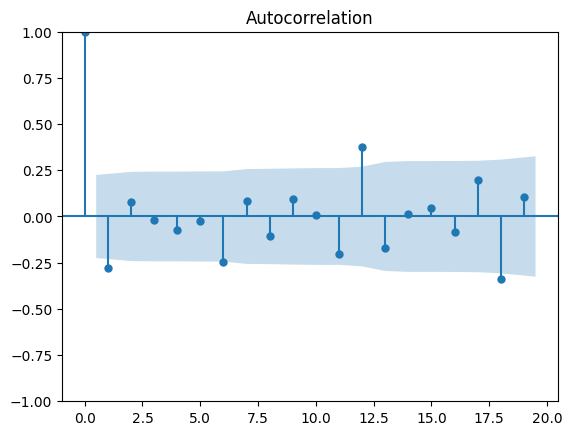

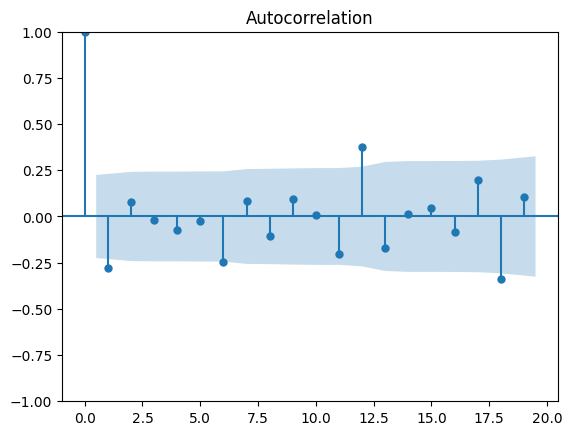

In [35]:
plot_acf(df_consumo['Super_diff'].dropna())

###### Prueba de Dickey-Fuller

In [36]:
result = adfuller(df_consumo['Super_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -11.34922565306169
p-value: 1.0091436498109487e-20


Podemos observar como fue necesaria la implementación de una diferenciación para que la serie de tiempo sea estacionaria.

##### Gas Propano

###### Gráfico de Autocorrelación

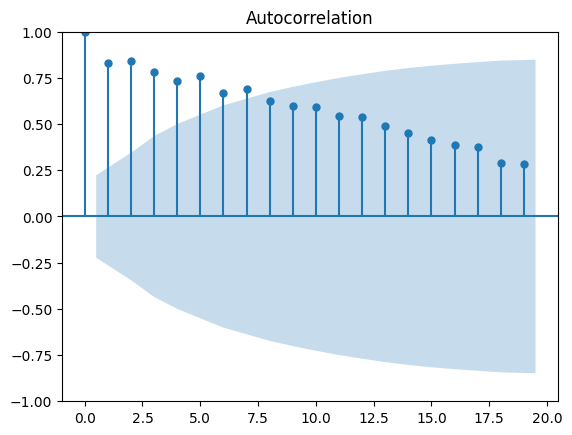

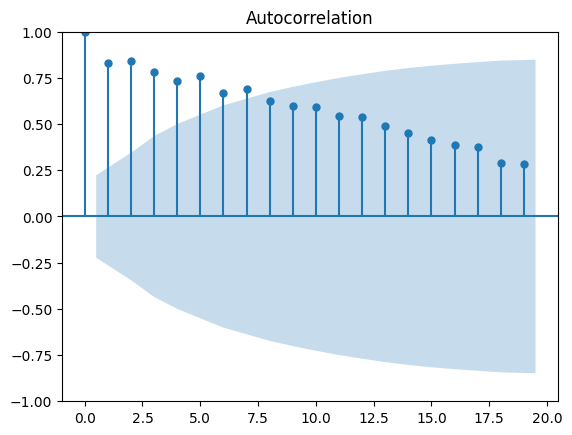

In [37]:
plot_acf(df_consumo['Propano'])

In [38]:
df_consumo['Propano_diff'] = df_consumo['Propano'].diff()

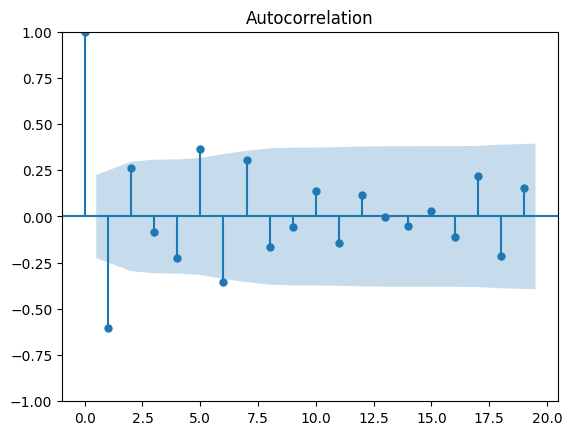

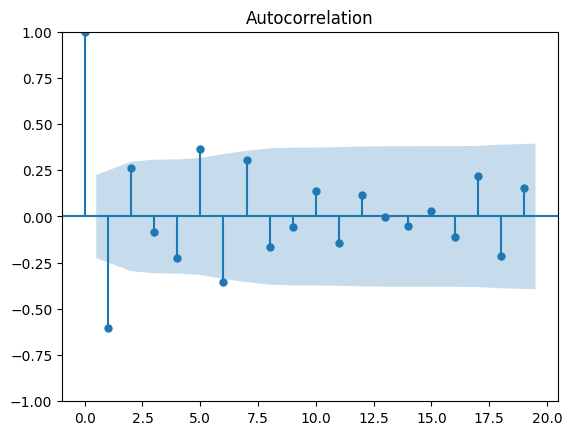

In [39]:
plot_acf(df_consumo['Propano_diff'].dropna())

###### Prueba de Dickey-Fuller

In [40]:
result = adfuller(df_consumo['Propano_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -7.538511215994348
p-value: 3.4272319389735725e-11


Podemos observar como fue necesaria la implementación de una diferenciación para que la serie de tiempo sea estacionaria.

#### Importación

##### Gasolina Diesel

###### Gráfico de Autocorrelación

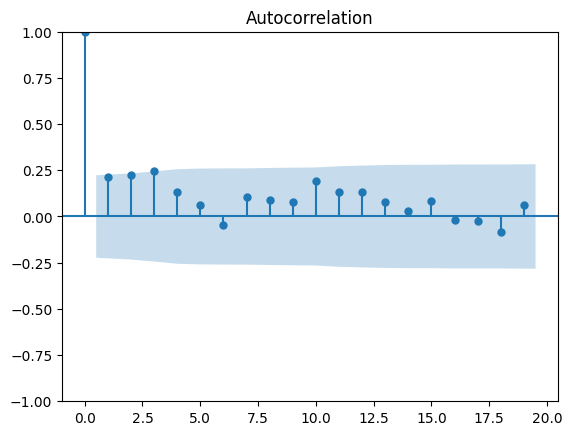

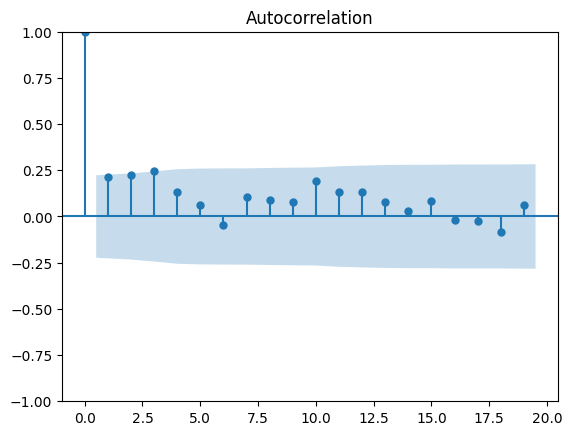

In [41]:
plot_acf(df_importacion['Diesel'])

###### Prueba de Dickey-Fuller

In [42]:
result = adfuller(df_importacion['Diesel'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.253034786666128
p-value: 0.0005351722312309939


Para la importación de gasolina Diesel, la serie de tiempo es estacionaria, no fue necesario realizar ninguna transformación.

##### Gasolina Regular

###### Gráfico de Autocorrelación

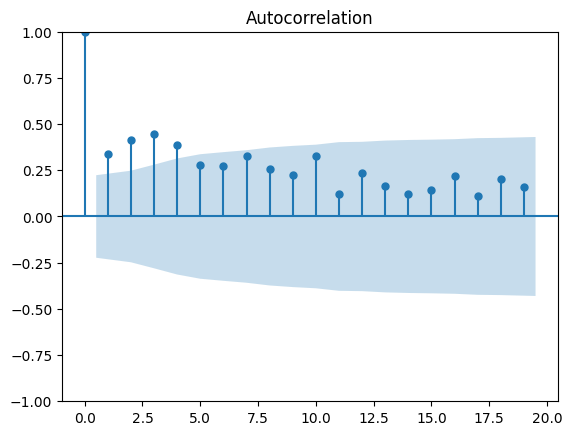

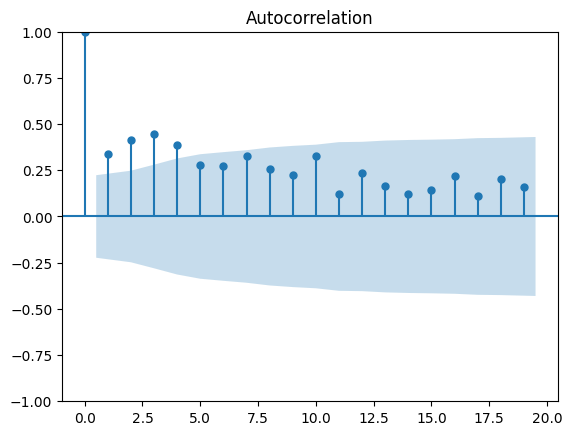

In [43]:
plot_acf(df_importacion['Regular'])

In [44]:
df_importacion['Regular_diff'] = df_importacion['Regular'].diff()

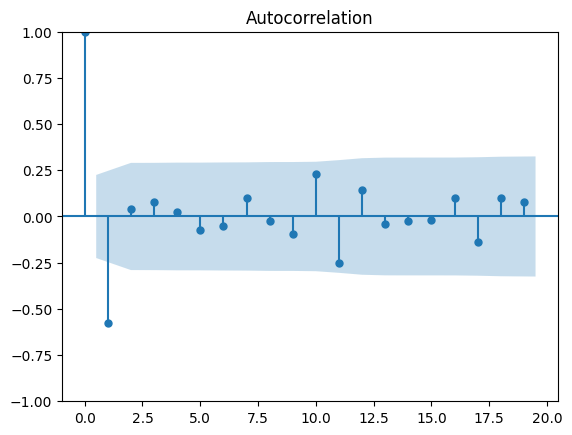

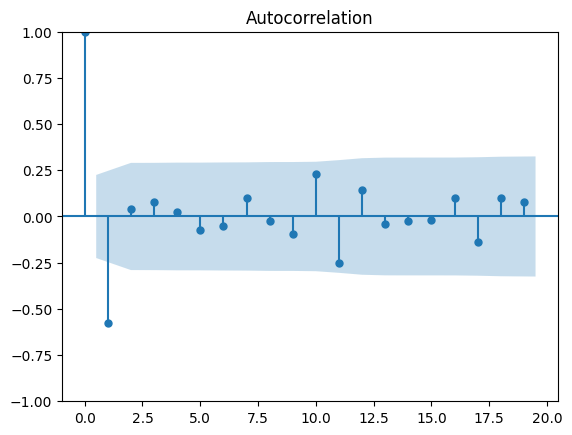

In [45]:
plot_acf(df_importacion['Regular_diff'].dropna())

###### Prueba de Dickey-Fuller

In [46]:
result = adfuller(df_importacion['Regular_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -8.844361084707593
p-value: 1.635876897982928e-14


Podemos observar como fue necesaria la implementación de una diferenciación para que la serie de tiempo sea estacionaria.

##### Gasolina Super

###### Gráfico de Autocorrelación

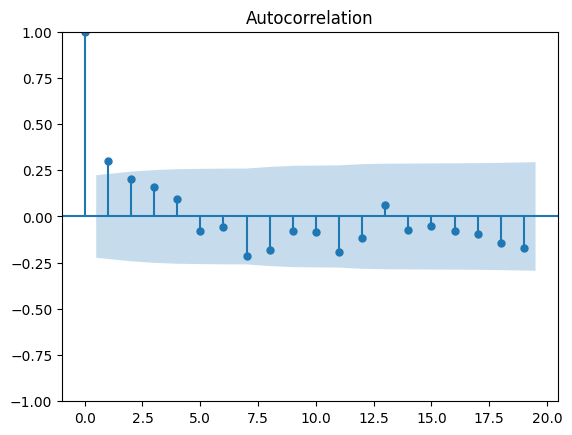

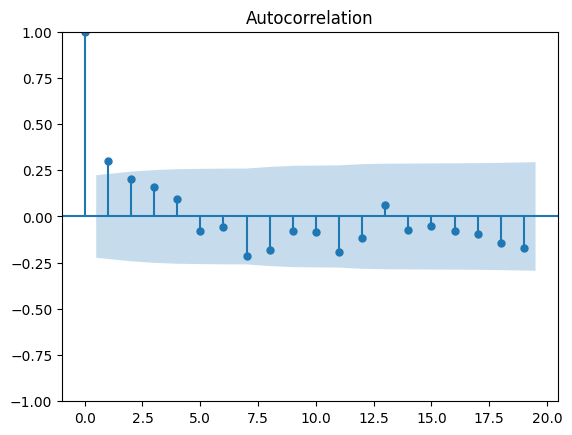

In [47]:
plot_acf(df_importacion['Super'])

###### Prueba de Dickey-Fuller

In [48]:
result = adfuller(df_importacion['Super'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -6.309962930598608
p-value: 3.2528419200882046e-08


Para la importación de gasolina Superior, la serie de tiempo es estacionaria, no fue necesario realizar ninguna transformación.

##### Gas Propano

###### Gráfico de Autocorrelación

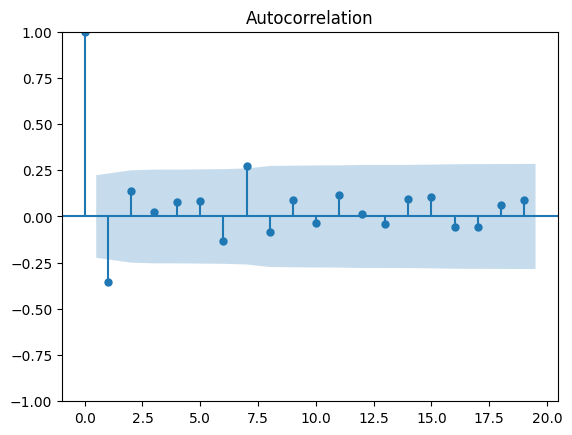

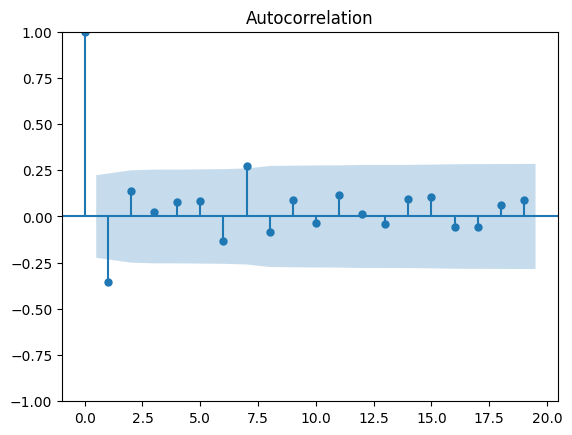

In [49]:
plot_acf(df_importacion['Propano'])

###### Prueba de Dickey-Fuller

In [50]:
result = adfuller(df_importacion['Propano'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -12.604232554582627
p-value: 1.709747814637403e-23


Para la importación de gas propano, la serie de tiempo es estacionaria, no fue necesario realizar ninguna transformación.

#### Precio

##### Gasolina Diesel

###### Gráfico de Autocorrelación

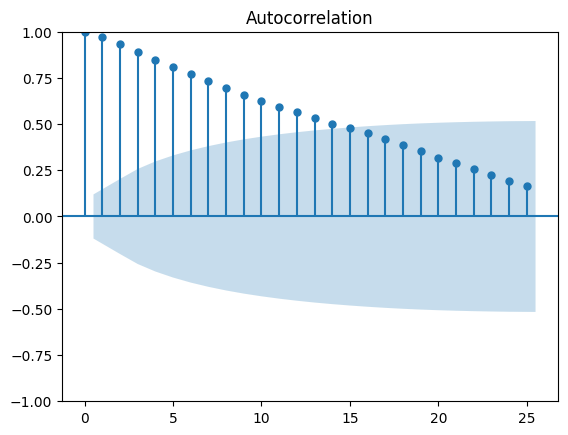

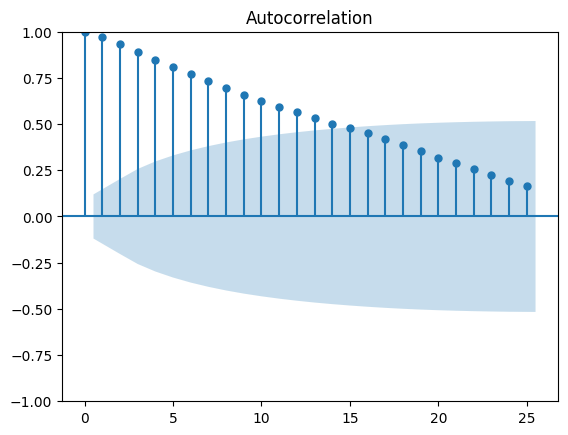

In [51]:
plot_acf(df_precio['Diesel'])

In [52]:
df_precio['Diesel_diff'] = df_precio['Diesel'].diff()

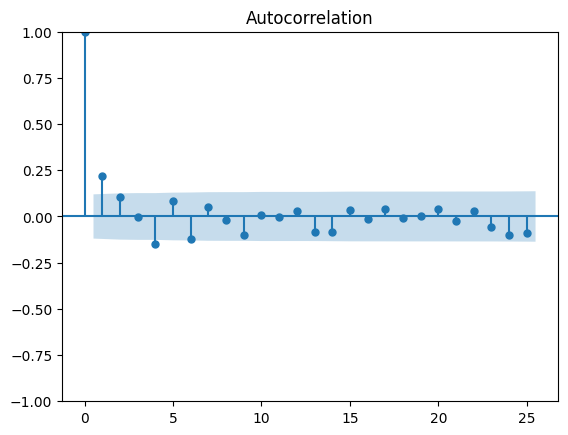

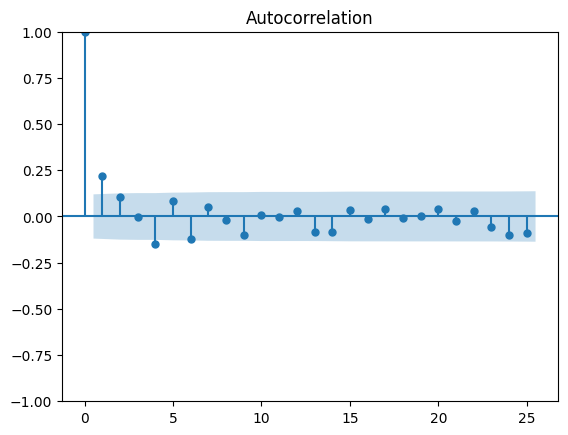

In [53]:
plot_acf(df_precio['Diesel_diff'].dropna())

In [54]:
result = adfuller(df_precio['Diesel_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.740689286609723
p-value: 6.285878537998254e-07


Podemos observar como fue necesaria la implementación de una diferenciación para que la serie de tiempo sea estacionaria.

##### Gasolina Regular

###### Gráfico de Autocorrelación

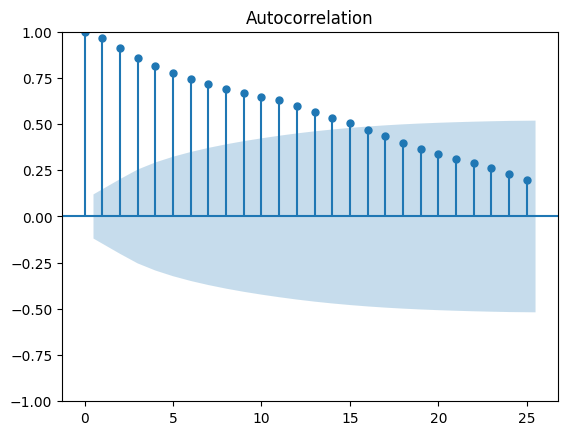

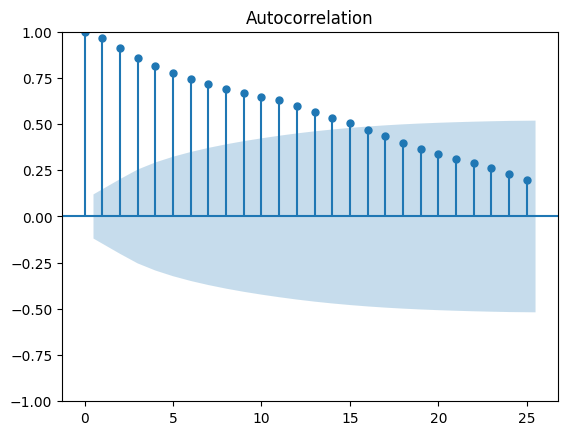

In [55]:
plot_acf(df_precio['Regular'])

In [56]:
df_precio['Regular_diff'] = df_precio['Regular'].diff()

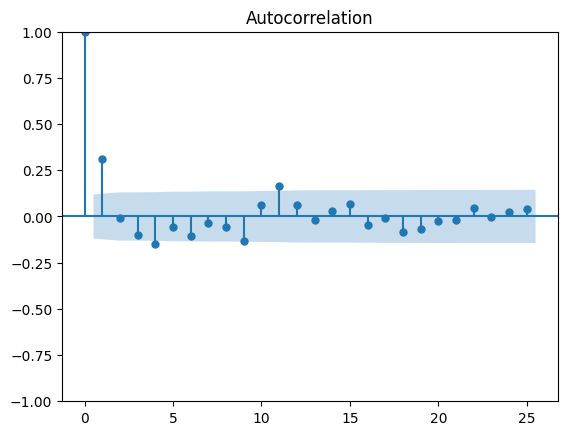

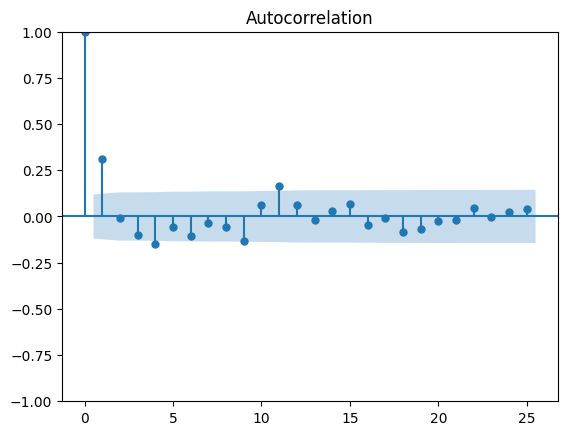

In [57]:
plot_acf(df_precio['Regular_diff'].dropna())

###### Prueba de Dickey-Fuller

In [58]:
result = adfuller(df_precio['Regular_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.781908943793765
p-value: 5.888957660623154e-05


Podemos observar como fue necesaria la implementación de una diferenciación para que la serie de tiempo sea estacionaria.

##### Gasolina Super

###### Gráfico de Autocorrelación

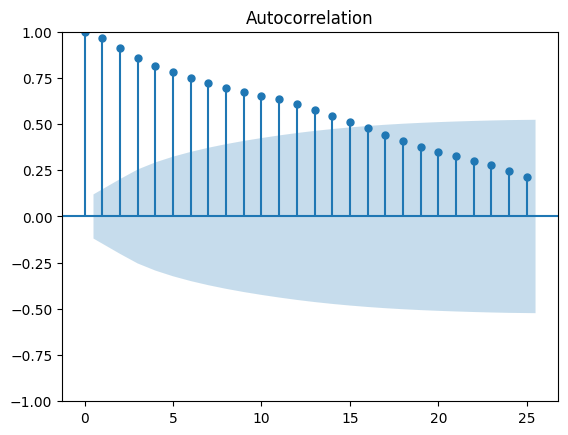

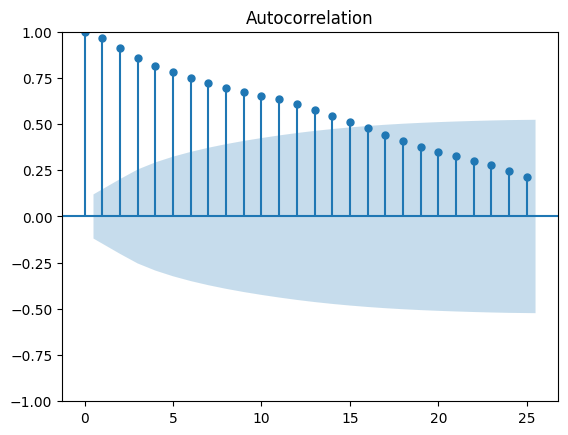

In [59]:
plot_acf(df_precio['Super'])

In [60]:
df_precio['Super_diff'] = df_precio['Super'].diff()

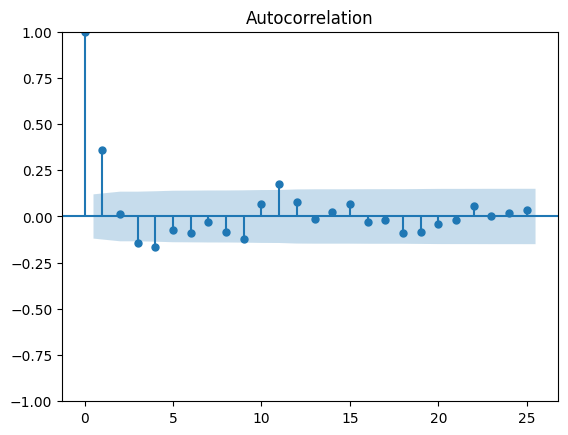

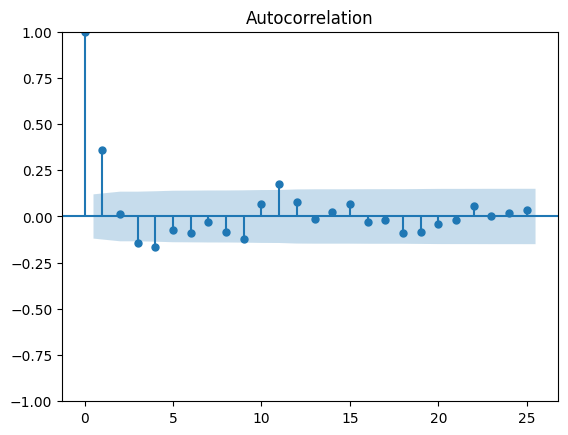

In [61]:
plot_acf(df_precio['Super_diff'].dropna())

###### Prueba de Dickey-Fuller

In [62]:
result = adfuller(df_precio['Super_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.772013517314114
p-value: 6.150215016773728e-05


Podemos observar como fue necesaria la implementación de una diferenciación para que la serie de tiempo sea estacionaria.

In [63]:
df_consumo.head()

,Diesel,Propano,Regular,Super,Diesel_diff,Regular_diff,Super_diff,Propano_diff
Fecha,,,,,,,,
2018-01-01,1105628.890,421848.920476,528763.30,581802.98,NaN,NaN,NaN,NaN
2018-02-01,1072071.670,379239.067143,502041.67,545210.00,-33557.220,-26721.63,-36592.98,-42609.853333
2018-03-01,1194136.180,415125.896429,571052.13,618402.18,122064.510,69010.46,73192.18,35886.829286
2018-04-01,1108452.970,370434.605238,526979.67,565665.72,-85683.210,-44072.46,-52736.46,-44691.291190
2018-05-01,1009750.145,403094.744048,544395.17,570129.66,-98702.825,17415.50,4463.94,32660.138810


#### Ajustamos los nombres de las columnas ya transformadas

##### Consumo

In [64]:
df_consumo.drop(columns=['Diesel'], inplace=True)
df_consumo.rename(columns={'Diesel_diff': 'Diesel'}, inplace=True)

df_consumo.drop(columns=['Regular'], inplace=True)
df_consumo.rename(columns={'Regular_diff': 'Regular'}, inplace=True)

df_consumo.drop(columns=['Super'], inplace=True)
df_consumo.rename(columns={'Super_diff': 'Super'}, inplace=True)

df_consumo.drop(columns=['Propano'], inplace=True)
df_consumo.rename(columns={'Propano_diff': 'Propano'}, inplace=True)

df_consumo.dropna(inplace=True)
df_consumo.head()

,Diesel,Regular,Super,Propano
Fecha,,,,
2018-02-01,-33557.220,-26721.63,-36592.98,-42609.853333
2018-03-01,122064.510,69010.46,73192.18,35886.829286
2018-04-01,-85683.210,-44072.46,-52736.46,-44691.291190
2018-05-01,-98702.825,17415.50,4463.94,32660.138810
2018-06-01,-79685.145,-25483.73,-15698.16,-13024.572381


##### Importación

In [65]:
df_importacion.drop(columns=['Regular'], inplace=True)
df_importacion.rename(columns={'Regular_diff': 'Regular'}, inplace=True)

df_importacion.dropna(inplace=True)
df_importacion.head()

,Diesel,Propano,Super,Regular
Fecha,,,,
2018-02-01,921684.12,591000.020476,629467.91,-62491.96
2018-03-01,889227.10,644245.403333,529507.15,54532.96
2018-04-01,696962.77,188590.813333,617512.28,-53069.06
2018-05-01,1592580.34,636234.130952,580329.35,69995.11
2018-06-01,777679.91,618811.331905,558257.59,-117204.50


##### Precio

In [66]:
df_precio.drop(columns=['Diesel'], inplace=True)
df_precio.rename(columns={'Diesel_diff': 'Diesel'}, inplace=True)

df_precio.drop(columns=['Regular'], inplace=True)
df_precio.rename(columns={'Regular_diff': 'Regular'}, inplace=True)

df_precio.drop(columns=['Super'], inplace=True)
df_precio.rename(columns={'Super_diff': 'Super'}, inplace=True)

df_precio.dropna(inplace=True)
df_precio.head()

,Diesel,Regular,Super
Fecha,,,
2002-02-01,-0.29,-0.29,-0.26
2002-03-01,0.03,0.27,0.29
2002-04-01,0.69,1.54,1.53
2002-05-01,0.06,0.08,0.05
2002-06-01,-0.12,-0.17,-0.20


### 2.f Estimación de Parámetros

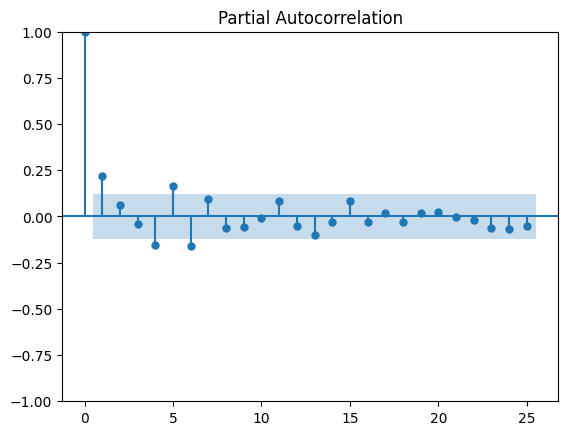

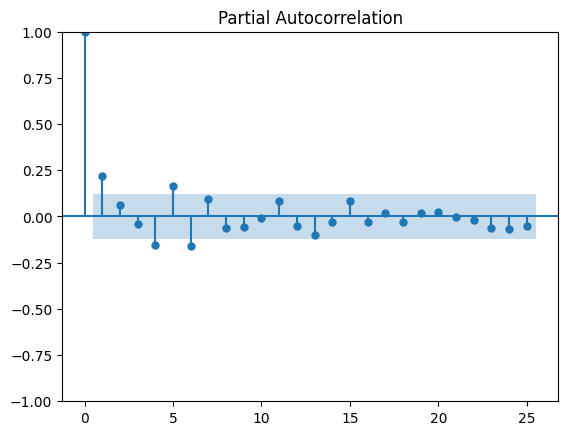

In [73]:
plot_pacf(df_precio['Diesel'].dropna())

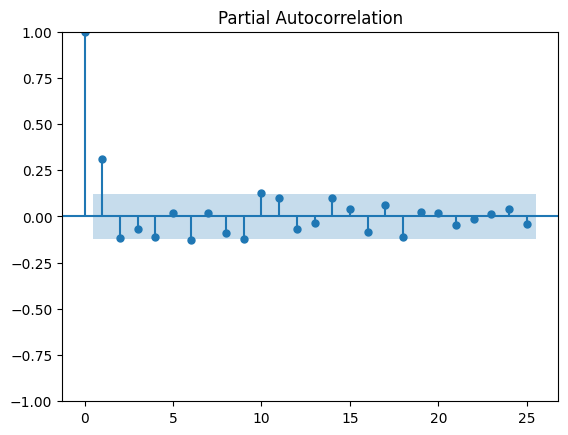

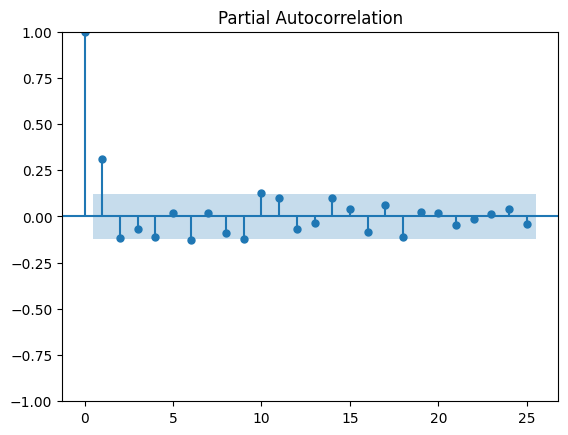

In [74]:
plot_pacf(df_precio['Regular'].dropna())

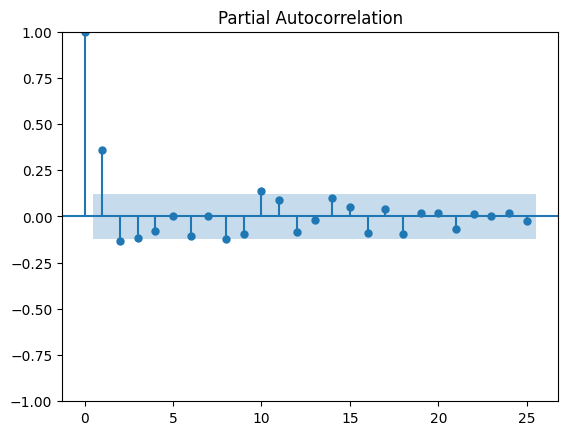

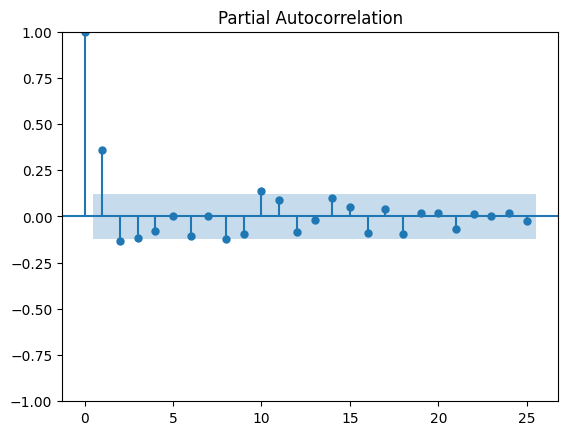

In [75]:
plot_pacf(df_precio['Super'].dropna())

In [89]:
model = ARIMA(df_precio['Diesel'], order=(1, 1, 1))
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Diesel   No. Observations:                  268
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -475.520
Date:                Sat, 03 Aug 2024   AIC                            957.040
Time:                        00:39:20   BIC                            967.802
Sample:                    02-01-2002   HQIC                           961.363
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.037      5.975      0.000       0.149       0.294
ma.L1         -0.9999      1.889     -0.529      0.596      -4.702       2.702
sigma2         2.0232      3.787      0.534      0.593      -5.399       9.446
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               371.27
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

p = 1: Rezago bruzcamente diferente en PACF

q = 1: Rezago bruzcamente diferente en ACF

d = 1: Número de diferenciaciones a la serie

In [88]:
model = ARIMA(df_precio['Regular'], order=(1, 1, 1))
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Regular   No. Observations:                  268
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -463.026
Date:                Sat, 03 Aug 2024   AIC                            932.052
Time:                        00:39:08   BIC                            942.814
Sample:                    02-01-2002   HQIC                           936.375
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3150      0.044      7.231      0.000       0.230       0.400
ma.L1         -0.9997      0.578     -1.730      0.084      -2.132       0.133
sigma2         1.8445      1.046      1.764      0.078      -0.205       3.894
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                42.53
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

p = 1: Rezago bruzcamente diferente en PACF

q = 1: Rezago bruzcamente diferente en ACF

d = 1: Número de diferenciaciones a la serie

In [87]:
model = ARIMA(df_precio['Super'], order=(1, 1, 1))
model_fit = model.fit()

model_fit.summary()

c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Super   No. Observations:                  268
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -453.616
Date:                Sat, 03 Aug 2024   AIC                            913.231
Time:                        00:38:53   BIC                            923.993
Sample:                    02-01-2002   HQIC                           917.554
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3653      0.050      7.369      0.000       0.268       0.462
ma.L1         -1.0000      9.188     -0.109      0.913     -19.009      17.009
sigma2         1.7192     15.777      0.109      0.913     -29.202      32.641
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                14.28
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

p = 1: Rezago bruzcamente diferente en PACF

q = 1: Rezago bruzcamente diferente en ACF

d = 1: Número de diferenciaciones a la serie

### 2.g Modelos ARIMA 

In [107]:
import itertools

p = range(0, 3)
d = 1
q = range(0, 3)
pdq = list(itertools.product(p, [d], q))

In [108]:
results_list = []

for param in pdq:
    try:
        model = ARIMA(df_precio['Diesel'], order=param)
        model_fit = model.fit()
        results_list.append({
            'pdq': param,
            'AIC': model_fit.aic,
            'BIC': model_fit.bic
        })
    except Exception as e:
        print(e)
        continue

In [109]:
results_df = pd.DataFrame(results_list)
results_df.sort_values(by='AIC')

,pdq,AIC,BIC
8,"(2, 1, 2)",953.168981,971.105224
5,"(1, 1, 2)",955.376470,969.725464
4,"(1, 1, 1)",957.039896,967.801642
7,"(2, 1, 1)",957.808921,972.157915
2,"(0, 1, 2)",959.035509,969.797255
1,"(0, 1, 1)",968.367492,975.541990
6,"(2, 1, 0)",1015.351343,1026.113089
3,"(1, 1, 0)",1027.472349,1034.646846
0,"(0, 1, 0)",1079.821938,1083.409187


In [111]:
results_list = []

for param in pdq:
    try:
        model = ARIMA(df_precio['Super'], order=param)
        model_fit = model.fit()
        results_list.append({
            'pdq': param,
            'AIC': model_fit.aic,
            'BIC': model_fit.bic
        })
    except Exception as e:
        print(e)
        continue

c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [112]:
results_df = pd.DataFrame(results_list)
results_df.sort_values(by='AIC')

,pdq,AIC,BIC
7,"(2, 1, 1)",910.327765,924.676760
2,"(0, 1, 2)",911.503439,922.265185
5,"(1, 1, 2)",912.171244,926.520239
4,"(1, 1, 1)",913.231168,923.992914
8,"(2, 1, 2)",914.889696,932.825939
1,"(0, 1, 1)",949.113631,956.288128
6,"(2, 1, 0)",984.893247,995.654992
3,"(1, 1, 0)",994.853247,1002.027745
0,"(0, 1, 0)",1006.411403,1009.998652


In [113]:
results_list = []

for param in pdq:
    try:
        model = ARIMA(df_precio['Regular'], order=param)
        model_fit = model.fit()
        results_list.append({
            'pdq': param,
            'AIC': model_fit.aic,
            'BIC': model_fit.bic
        })
    except Exception as e:
        print(e)
        continue

c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [114]:
results_df = pd.DataFrame(results_list)
results_df.sort_values(by='AIC')

,pdq,AIC,BIC
2,"(0, 1, 2)",929.319696,940.081442
7,"(2, 1, 1)",930.478453,944.827448
5,"(1, 1, 2)",931.260652,945.609646
4,"(1, 1, 1)",932.052356,942.814102
8,"(2, 1, 2)",932.065890,950.002134
1,"(0, 1, 1)",957.713717,964.888215
6,"(2, 1, 0)",1002.021556,1012.783302
3,"(1, 1, 0)",1017.863555,1025.038053
0,"(0, 1, 0)",1035.151606,1038.738855


Se puede observar que los valores de AIC y BIC obtenidos con los párametros p =1, d=1, q=1 obtenidos del analisis de los modelos son de los mejores a comparación de otros ARIMA.

A pesar de esto, los valores de AIC y BIC son anormales, y posiblemente sea necesario otro modelo mas complejo para poder capturar la serie.

### 2.h Modelos prophet 

In [117]:
df_precio_prophet = get_df('data/precios.csv')
df_precio_prophet.head()

,Super,Regular,Diesel
Fecha,,,
2002-01-01,12.55,12.19,8.95
2002-02-01,12.29,11.90,8.66
2002-03-01,12.58,12.17,8.69
2002-04-01,14.11,13.71,9.38
2002-05-01,14.16,13.79,9.44


In [139]:
df_precio_prophet = df_precio_prophet.reset_index()
df_prophet_diesel = df_precio_prophet.rename(columns={'Fecha': 'ds', 'Diesel': 'y'}).drop(columns=['Regular', 'Super'])
df_prophet_regular = df_precio_prophet.rename(columns={'Fecha': 'ds', 'Regular': 'y'}).drop(columns=['Diesel', 'Super'])
df_prophet_super = df_precio_prophet.rename(columns={'Fecha': 'ds', 'Super': 'y'}).drop(columns=['Diesel', 'Regular'])

In [140]:
from prophet import Prophet

model_prophet_diesel = Prophet()
model_prophet_diesel.fit(df_prophet_diesel)

model_prophet_regular = Prophet()
model_prophet_regular.fit(df_prophet_regular)

model_prophet_super = Prophet()
model_prophet_super.fit(df_prophet_super)

01:39:24 - cmdstanpy - INFO - Chain [1] start processing
01:39:24 - cmdstanpy - INFO - Chain [1] done processing
01:39:24 - cmdstanpy - INFO - Chain [1] start processing
01:39:24 - cmdstanpy - INFO - Chain [1] done processing
01:39:24 - cmdstanpy - INFO - Chain [1] start processing
01:39:24 - cmdstanpy - INFO - Chain [1] done processing


In [141]:
future_diesel = model_prophet_diesel.make_future_dataframe(periods=12, freq='M')
forecast_diesel = model_prophet_diesel.predict(future_diesel)

future_regular = model_prophet_regular.make_future_dataframe(periods=12, freq='M')
forecast_regular = model_prophet_regular.predict(future_regular)

future_super = model_prophet_super.make_future_dataframe(periods=12, freq='M')
forecast_super = model_prophet_super.predict(future_super)

c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\monto\AppData\Local\Temp\ipykernel_5880\288394087.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_

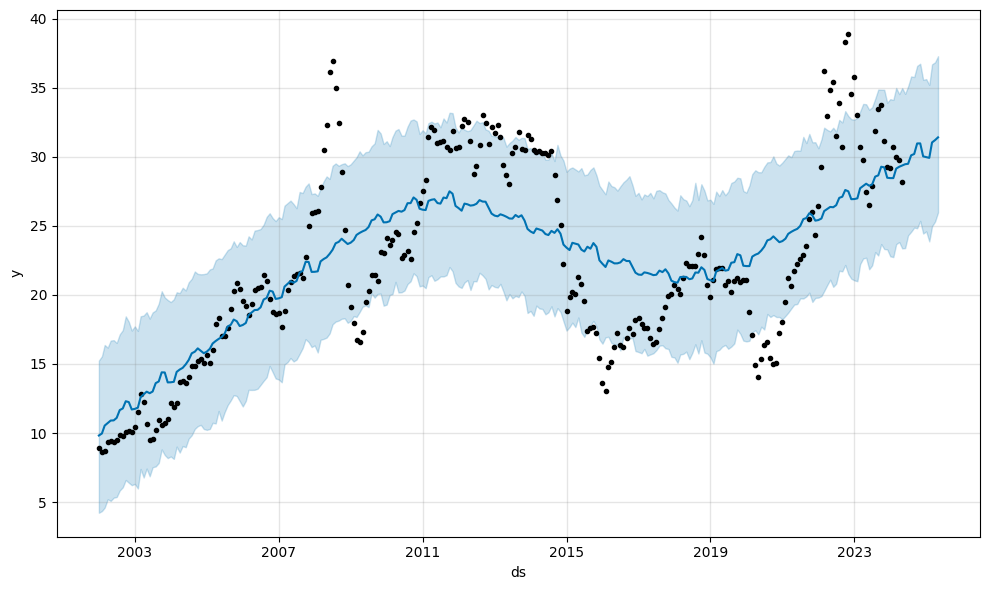

In [148]:
model_prophet_diesel.plot(forecast_diesel).show()

C:\Users\monto\AppData\Local\Temp\ipykernel_5880\151685310.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_prophet_regular.plot(forecast_regular).show()


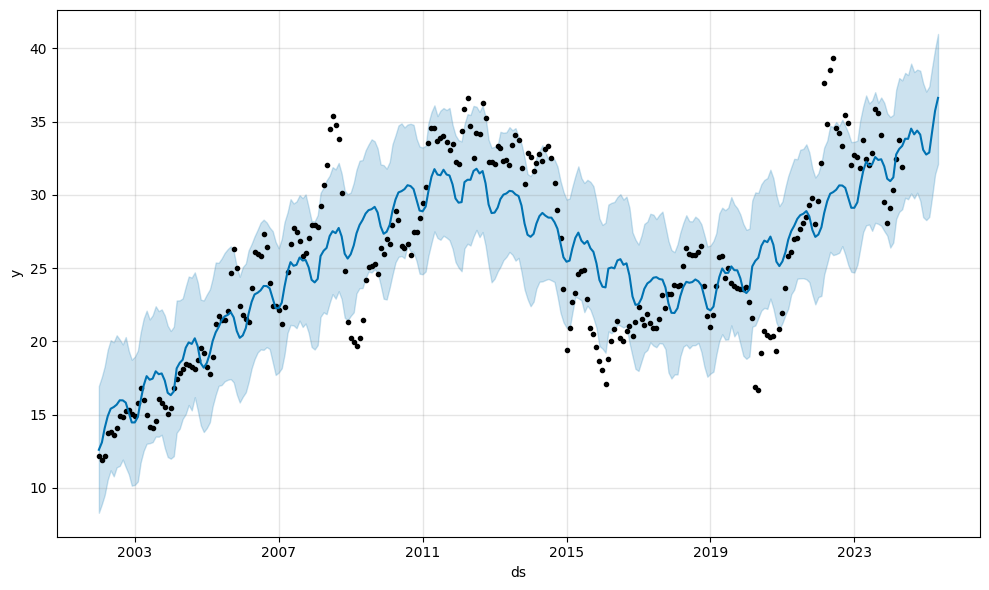

In [149]:
model_prophet_regular.plot(forecast_regular).show()

C:\Users\monto\AppData\Local\Temp\ipykernel_5880\1795029902.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  model_prophet_super.plot(forecast_super).show()


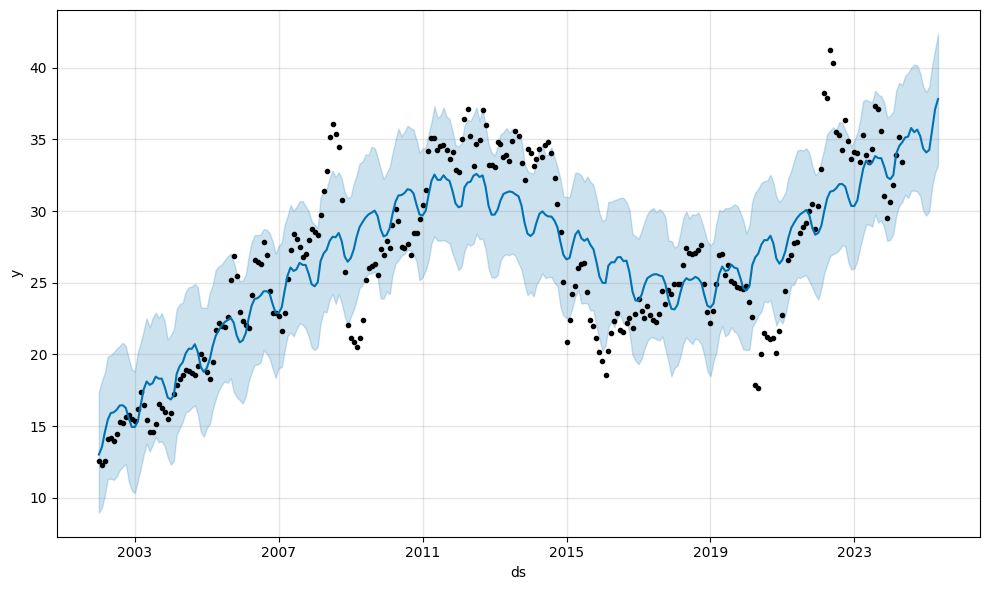

In [150]:
model_prophet_super.plot(forecast_super).show()

c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:354: FutureWarning: 

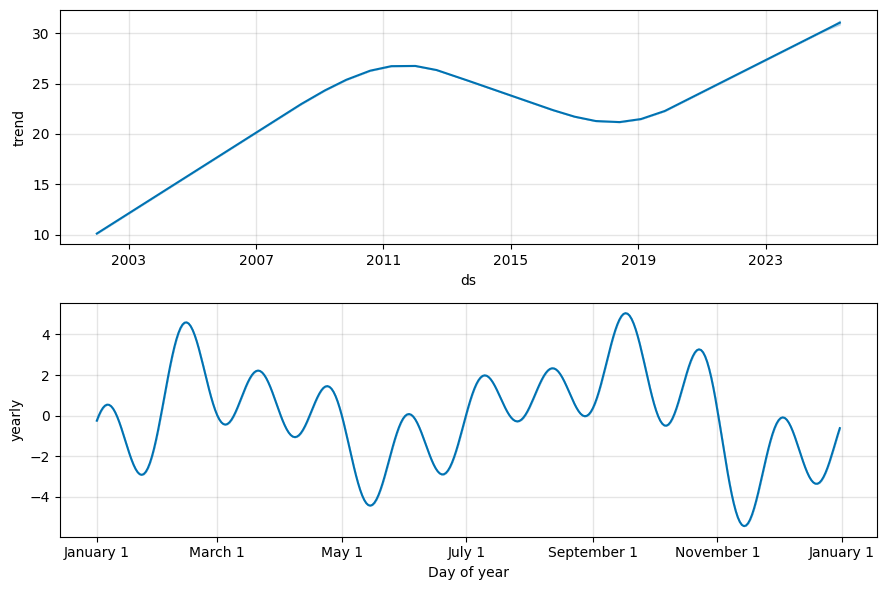

In [151]:
model_prophet_diesel.plot_components(forecast_diesel).show()

c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:354: FutureWarning: 

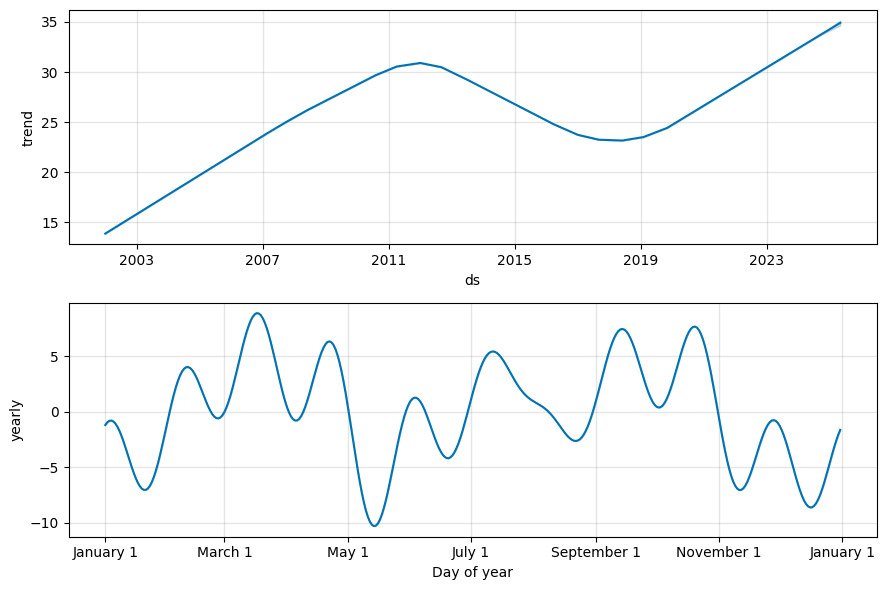

In [152]:
model_prophet_regular.plot_components(forecast_regular).show()

c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\monto\OneDrive\Documents\UVG\8. Octavo semestre\DataSci\GUA-Gasoline-Analysis\.venv\lib\site-packages\prophet\plot.py:354: FutureWarning: 

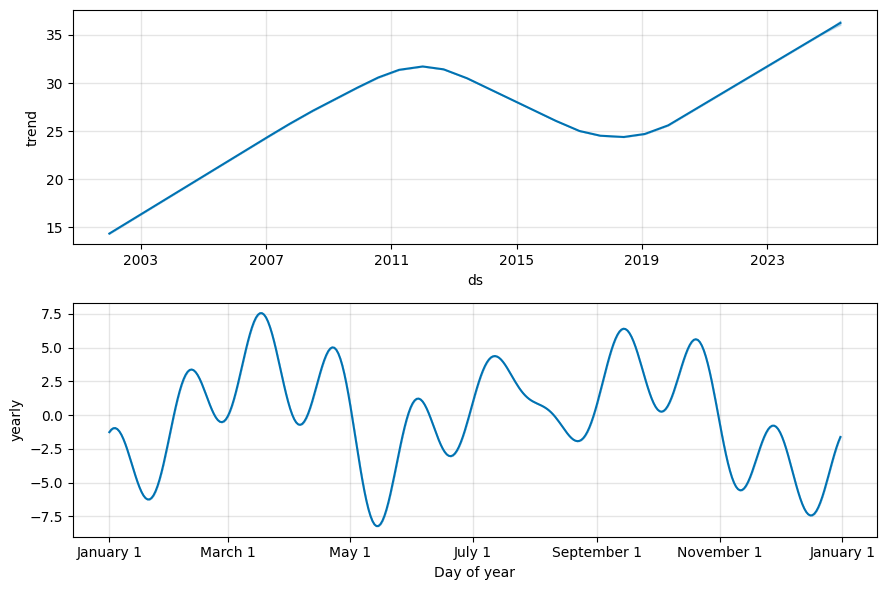

In [153]:
model_prophet_super.plot_components(forecast_super).show()

El modelo realizado por prophet muestra mejores resultados que los modelos ARIMA realizados anteriormente.